In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from pylab import *

In [26]:
data = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_extreme/eca_r10mm.CIR.spatial.nc')
data = data.squeeze()

In [ ]:
data.variables

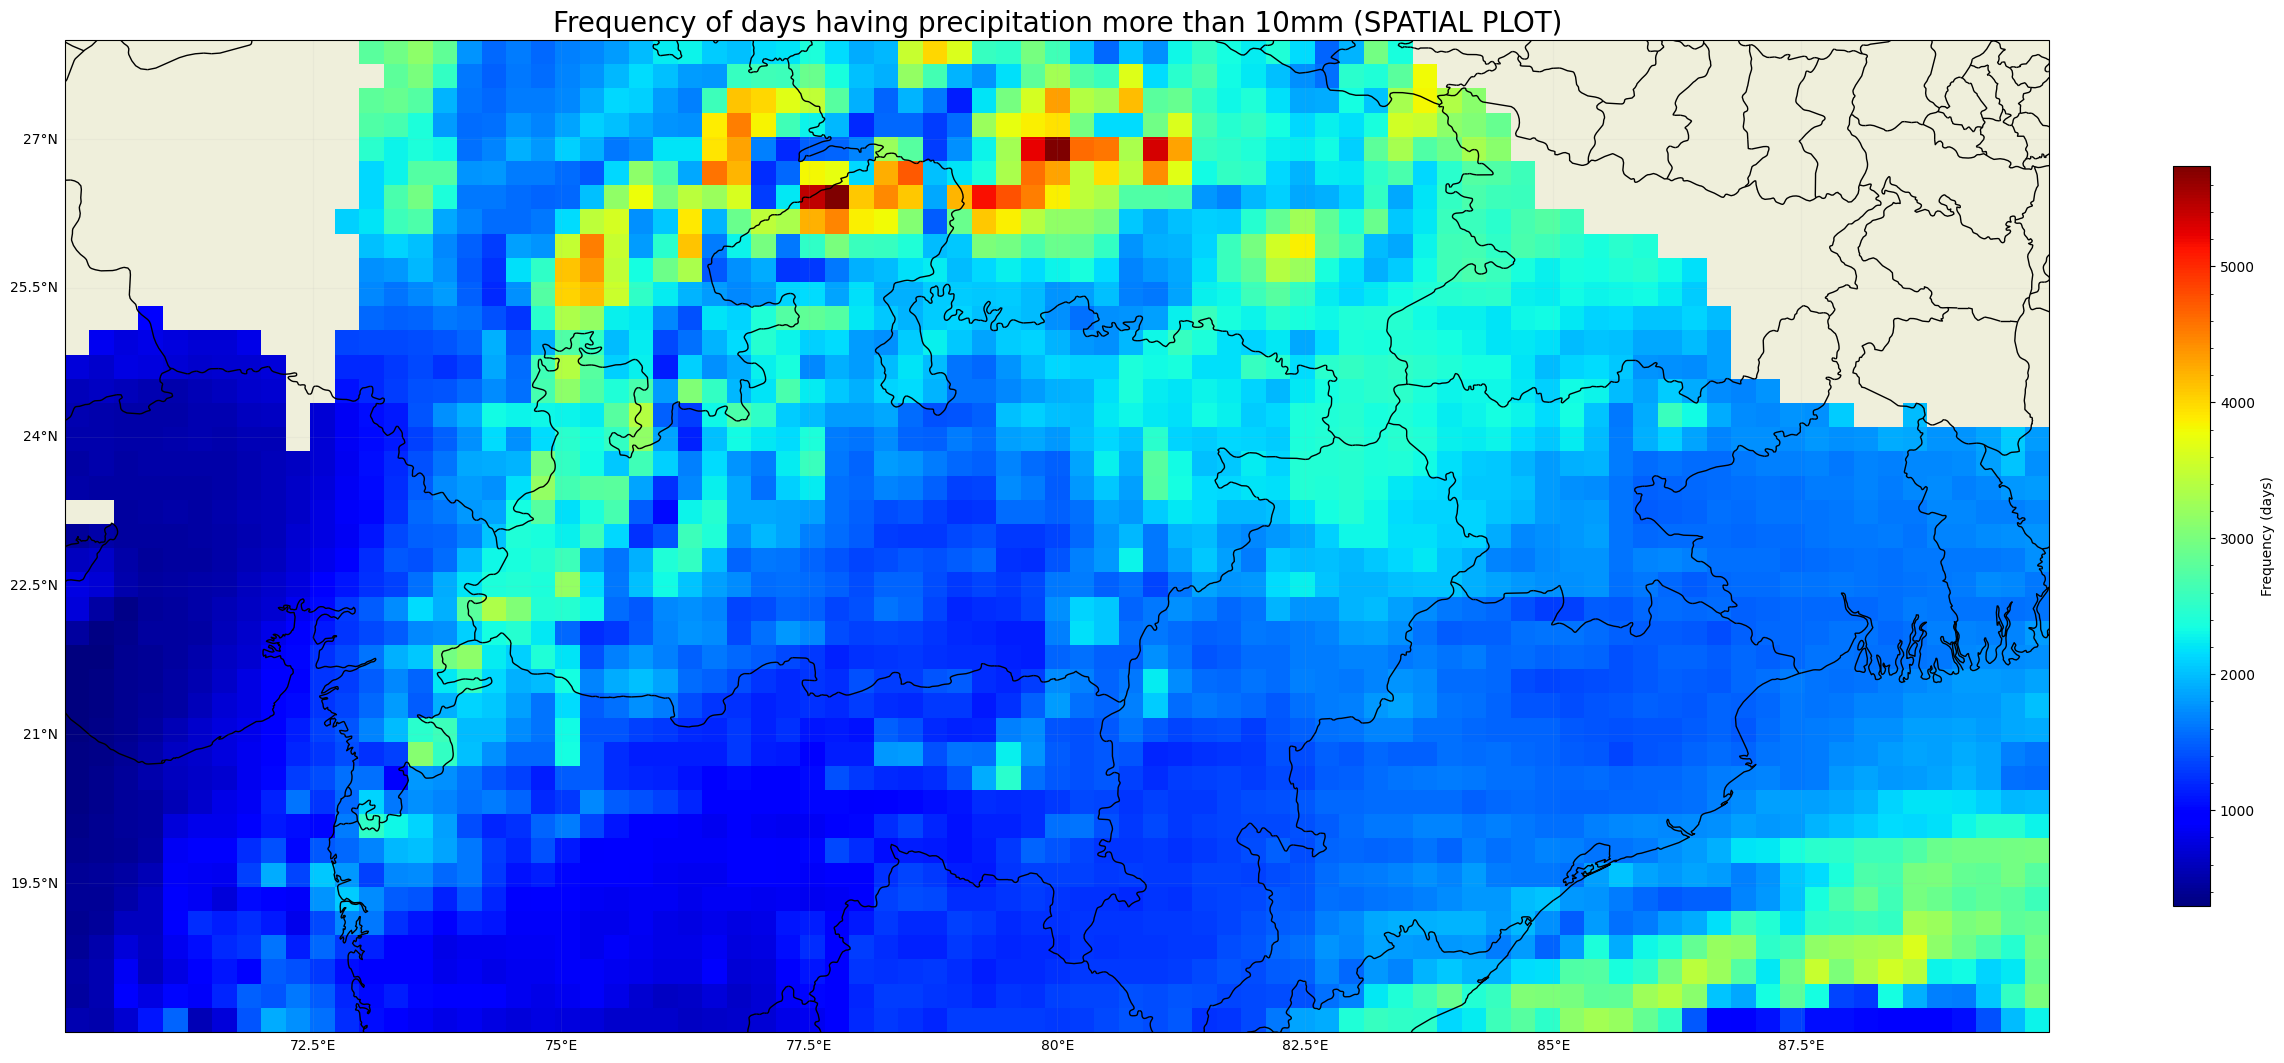

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from pylab import *

data = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_extreme/eca_r10mm.CIR.spatial.nc')
data = data.squeeze()

data_array = np.asarray(data['heavy_precipitation_days_index_per_time_period'])
lon = data.longitude
lat = data.latitude

fig = plt.figure(figsize=(32,32))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(data_array,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='lower')
plt.title('Frequency of days having precipitation more than 10mm (SPATIAL PLOT) over CIR region',fontsize=20)

# rest of the code remains the same


states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Frequency (days)')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

# plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/10mm.spatial.CIR.png', dpi=1200, bbox_inches='tight')
plt.show()


In [ ]:
# running through all the .nc files and plotting the image data for the same 
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs

# Path to the directory containing the netCDF files
data_dir = '/home/shiv/Documents/GitHub/EES405/clim_extreme/'

# Loop over all netCDF files in the directory
for file in os.listdir(data_dir):
    if file.endswith('spatial.nc'):
        # Load the data and squeeze to remove any dimensions of size 1
        data = xr.open_dataset(os.path.join(data_dir, file)).squeeze()

        # Extract the data and coordinates
        data_array = np.asarray(data['heavy_precipitation_days_index_per_time_period'])
        lon = data.longitude
        lat = data.latitude

        # Create the figure and axis objects
        fig = plt.figure(figsize=(16,9))
        ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

        # Create the plot with imshow
        mp = ax.imshow(data_array,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='lower')

        states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
        ax.add_feature(cfeature.BORDERS,edgecolor='black')
        ax.add_feature(states_provinces, edgecolor='black')

        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.OCEAN)


        cbar = fig.colorbar(mp, shrink=0.3,label='Frequency (days)')
        cbar.minorticks_on()

        #adding the long lat grids and enabling the tick labels
        gl = ax.gridlines(draw_labels=True,alpha=0.1)
        gl.top_labels = False
        gl.right_labels = False

        # Set the title of the plot to the filename and save the figure
        plt.title(file)
        plt.savefig(os.path.join(data_dir, file[:-3] + '.png'), dpi=1200, bbox_inches='tight')
        plt.show()


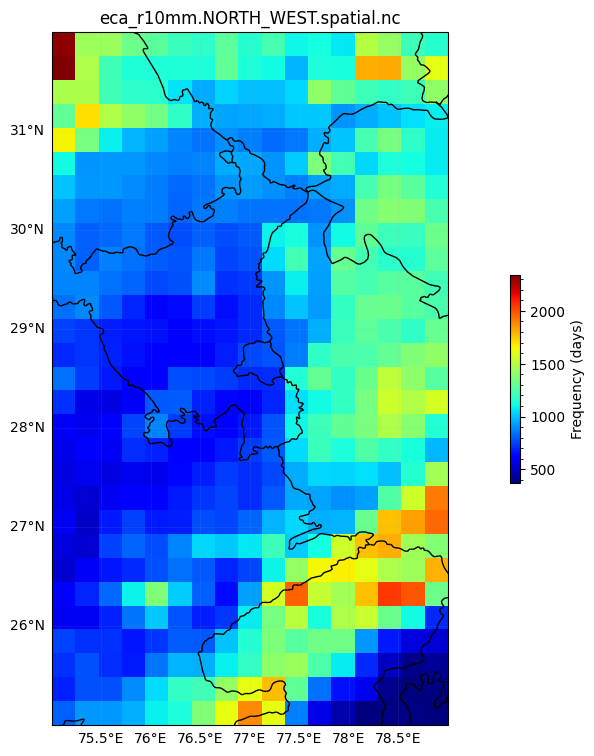

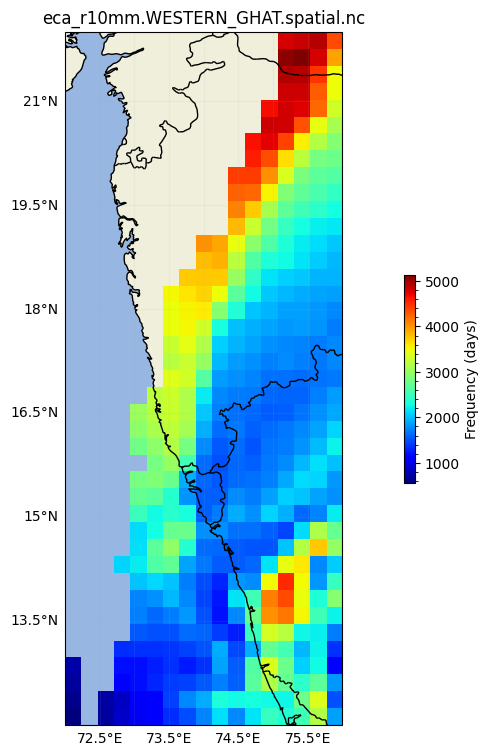

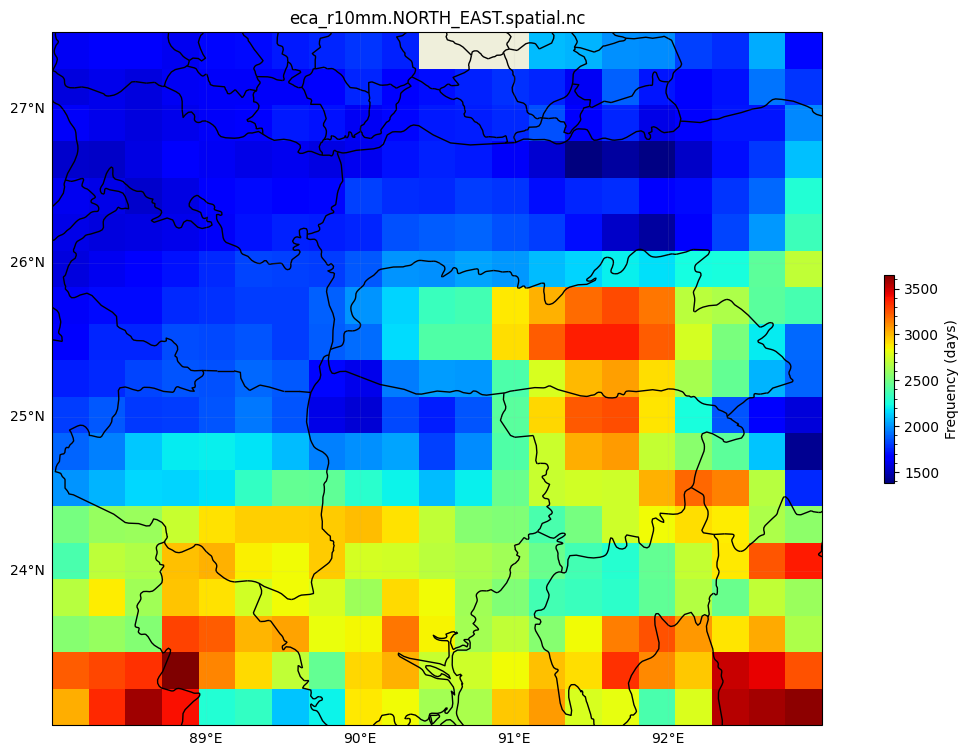

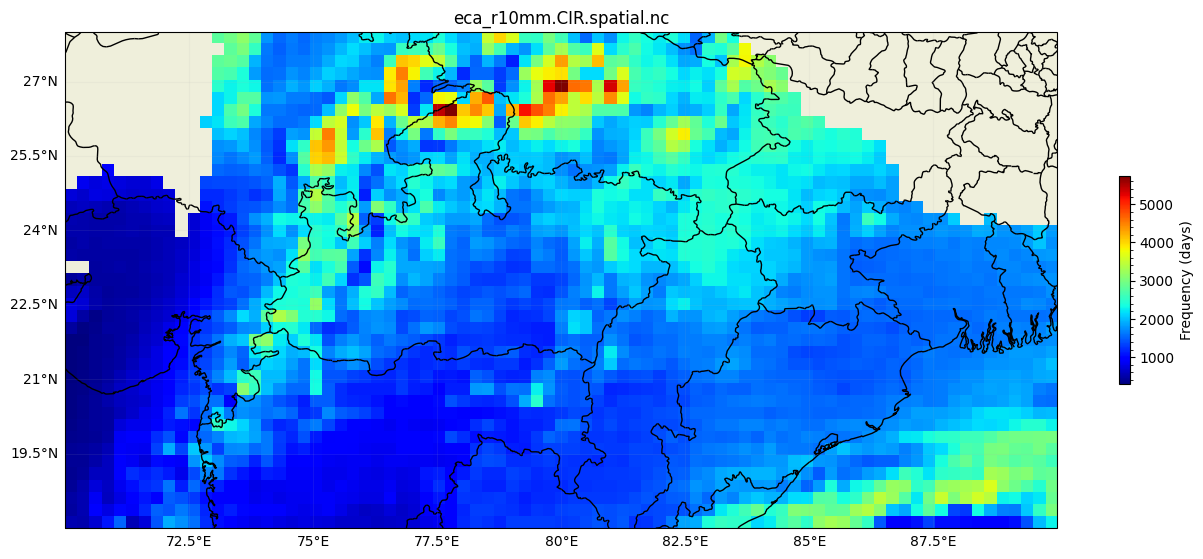

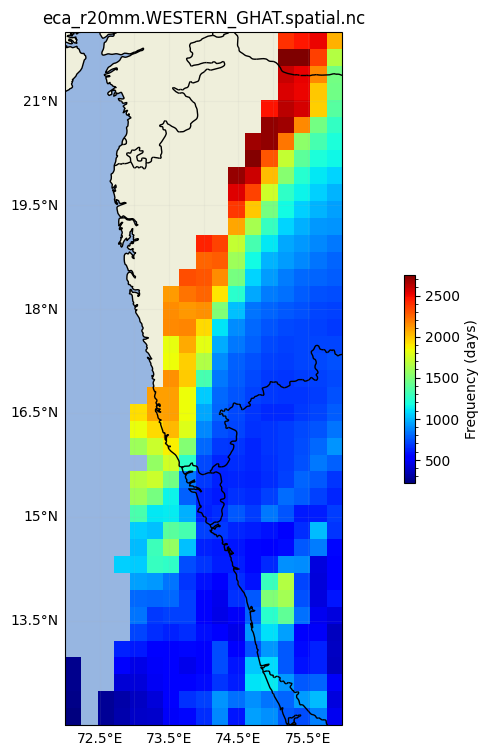

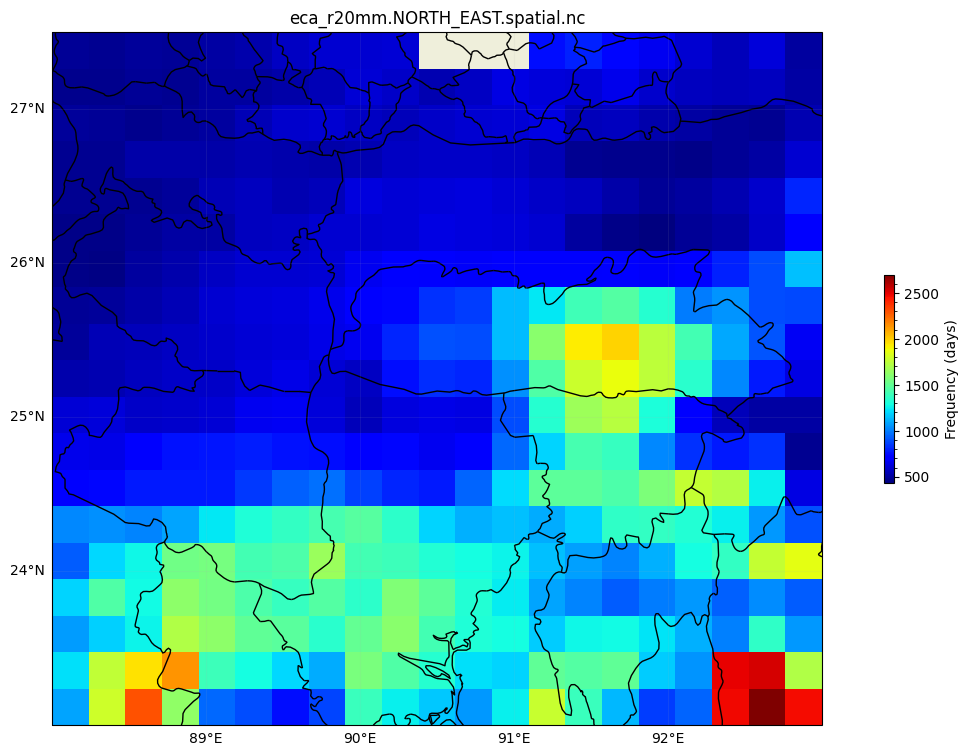

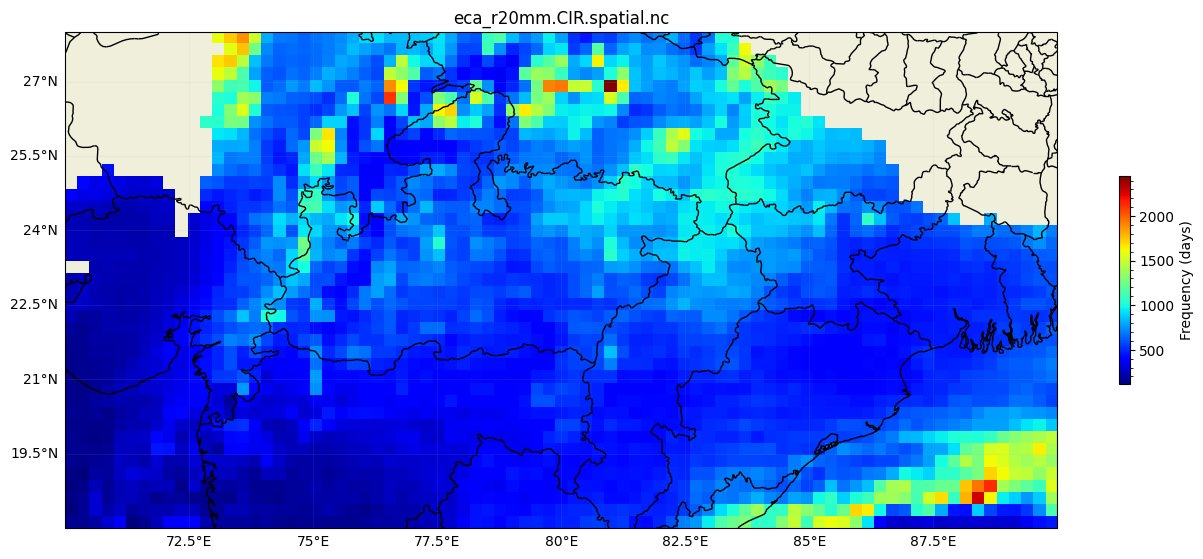

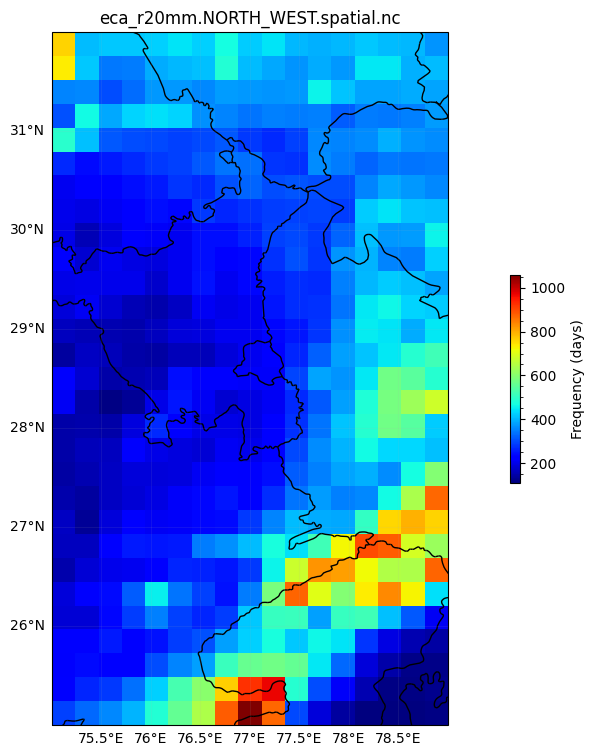

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs

data_dir = '/home/shiv/Documents/GitHub/EES405/clim_extreme/'
plot_dir = '/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/'

# Loop over all files in data directory ending with 'eca*spatial.nc'
for filename in os.listdir(data_dir):
    if filename.endswith('spatial.nc'):
        
        # Open the dataset and squeeze out any size-1 dimensions
        data = xr.open_dataset(os.path.join(data_dir, filename))
        # data = data.squeeze()

        # Extract the data array and coordinates
        data_array = data.to_array().values.squeeze()
        lon = data.longitude
        lat = data.latitude

        # Create the figure and axis
        fig = plt.figure(figsize=(16,9))
        ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

        # Create the plot with imshow
        mp = ax.imshow(data_array,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='lower')
        plt.title(filename)

        # Add map features
        states_provinces = cfeature.NaturalEarthFeature(
                category='cultural',
                name='admin_1_states_provinces_lines',
                scale='10m',
                facecolor='none')
        ax.add_feature(cfeature.BORDERS,edgecolor='black')
        ax.add_feature(states_provinces, edgecolor='black')
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.OCEAN)

        # Add colorbar
        cbar = fig.colorbar(mp, shrink=0.3,label='Frequency (days)')
        cbar.minorticks_on()

        # Add gridlines
        gl = ax.gridlines(draw_labels=True,alpha=0.1)
        gl.top_labels = False
        gl.right_labels = False

        # Save the figure with appropriate title
        plot_title = os.path.splitext(filename)[0] + '.png'
        plt.savefig(os.path.join(plot_dir, plot_title), dpi=600)
        plt.show()
